# Lasso Regression
fitting by Gaussian

In [20]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [12]:
def f(x):
    return np.exp(-(x + 1.0) * (x + 1.0)) + 2.0 * np.exp(-(x - 2.0) * (x - 2.0)) + 0.5 * np.exp(-(x - 5.0) * (x - 5.0))

def make_data(x, f, ep):
    return f(x) + np.random.normal(0, ep, x.shape[0])

In [13]:
x = np.arange(-10, 10, 0.1)
y = make_data(x, f, 0.1)

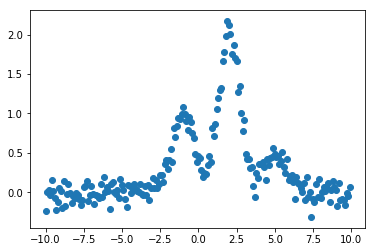

In [14]:
plt.scatter(x, y)

In [19]:
# gaussian whose mean is in range -5 to 5
gdata = []
for i in range(-5, 6):
    gdata.append(np.exp(-(x-i)*(x-i)))
gdata = np.array(gdata).T
gdata.shape

(200, 11)

In [21]:
# define model
model = linear_model.LinearRegression()
model.fit(gdata, y)

/Users/fkiyozawa/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
xp = np.arange(-10, 10, 0.01)
gdatap = []
for i in range(-5, 6):
    gdatap.append(np.exp(-(xp-i)*(xp-i)))
gdatap = np.array(gdatap).T

In [23]:
yp = model.predict(gdatap)

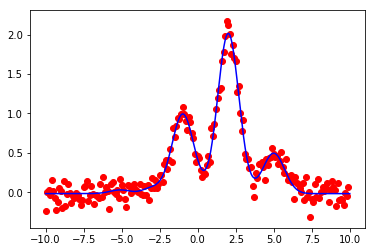

In [26]:
plt.scatter(x, y, color='red')
plt.plot(xp, yp, color='blue')

In [27]:
print(model.coef_)

[ 0.05282713 -0.01992468  0.08157531 -0.00414155  0.99132438  0.05661371
 -0.0780212   2.07471186 -0.03875336  0.01558352  0.50759297]


In [67]:
# lasso
modell = linear_model.Lasso(0.003)
modell.fit(gdata, y)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
xpl = np.arange(-10, 10, 0.01)
gdatapl = []
for i in range(-5, 6):
    gdatapl.append(np.exp(-(xpl-i)*(xpl-i)))
gdatapl = np.array(gdatapl).T
ypl = modell.predict(gdatapl)

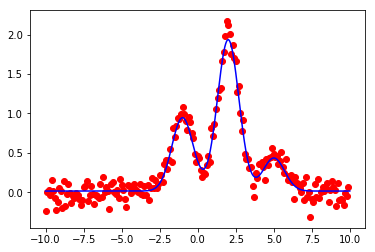

In [69]:
plt.scatter(x, y, color='red')
plt.plot(xpl, ypl, color='blue')

In [70]:
print(modell.coef_)

[0.         0.         0.         0.         0.93123834 0.
 0.         1.92141413 0.         0.         0.41958912]
